---
# Documentation: https://wowchemy.com/docs/managing-content/

title: "ROC Curves"
subtitle: "Plots and Discusses ROC curves for Binary and Multiclass Classification Problems Using the Iris Dataset"
summary: "Plots and Discusses ROC curves for Binary and Multiclass Classification Problems Using the Iris Dataset"
authors: ["Scott Miner"]
tags: ["ROC Curves", "Receiver Operating Characteristic", "Multiclass Classification", "Confusion Matrix", "Confusion Matrices", "Thresholds", "Sklearn", "Scikit-Learn", "Python", "Iris Dataset", "One-versus-Rest", "Classifiers"]
categories: ["ROC Curves", "Receiver Operating Characteristic", "Multiclass Classification", "Thresholds", "Confusion Matrix", "Confusion Matricies", "Sklearn", "Scikit-Learn", "Python", "Iris Dataset", "One-versus-Rest", "Classifiers"]
date: 2022-05-30T01:24:19.362213
lastmod: 2022-05-30T01:24:19.362213
featured: false
draft: false

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder.
# Focal points: Smart, Center, TopLeft, Top, TopRight, Left, Right, BottomLeft, Bottom, BottomRight.
image:
  caption: ""
  focal_point: ""
  preview_only: false

# Projects (optional).
#   Associate this post with one or more of your projects.
#   Simply enter your project's folder or file name without extension.
#   E.g. `projects = ["internal-project"]` references `content/project/deep-learning/index.md`.
#   Otherwise, set `projects = []`.
projects: []
---

# Overview

---

This post takes off where the [last one](https://scottminer.netlify.app/post/multi-class-confusion-matrix/) left off and discusses ROC curves, otherwise known as Receiver Operating Characteristic curves. ROC curves have a long history in classification. ROC curves were first used in World War II to quantify the radar tracking of bombers headed toward England.

ROC curves typically feature the true positive rate (TPR) on the Y axis and the false positive rate (FPR) on the X axis. The TPR is also known as the sensitivity. The FPR can be calculated by subtracting the specificity from 1: $\text{FPR} = 1 - \text{specificity}$. Both the TPR and FPR measure the classifier's performance with respect to the real world. TPR and FPR values of 1.0 and 0.0, respectively, indicate a perfect classifier.

In `sklearn`, the `roc_curve` function from the `metrics` module computes ROC curves via the `y_true` and `y_score` parameters. The `y_true` parameter accepts true binary labels as `ndarrays` of shape `(n_samples,)`. If the labels are not either `{-1, 1}` or `{0, 1}` then `pos_label` (positive label) should be set explicitly. Meanwhile, the `y_score` parameter accepts target scores as `ndarrays` of shape `(n_samples,)`. The target scores can be probability estimates of the positive class, confidence values, or non-thresholded measures of decisions (as returned by the `decision_function` of some classifiers).

The implementation of the `roc_curve` function in `sklearn` is restricted to binary classification. To demonstrate it, let's convert the Iris dataset to a binary classification problem. Instead of asking, "Is the Iris class that of setosa, versicolor, or virginica?" we ask whether the sample is versicolor. We use the `predict_proba` method rather than the `predict` method to return the false and true probabilities in two columns. For the ROC curve, we are interested in the true column, which is the second column.

Let's import the needed libraries and look at an example.

# Imports

---


In [115]:
# imports
import numpy as np
import pandas as pd
import textwrap
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
warnings.simplefilter(action='ignore', category=[FutureWarning])

## Matplotlib & Seaborn Settings

---


In [98]:
mpl.rcParams.update({'font.size': 26})
mpl.rc('figure', figsize=(8, 8))
sns.set(font_scale=2.0)
sns.color_palette("deep")
%matplotlib inline

# Iris Dataset - Binary Classification Problem

---

After converting the problem to a binary classification problem indicating whether the target variable is that of the Iris veriscolor class, we split the data into training and test sets. We then use the `GaussianNB` method of the `naive_bayes` module to fit our classifier on the Iris dataset's training features and target variable. We get the likelihood of each prediction being true by applying the `predict_proba` method to the dataset's test features and storing the second column of the result in the `prob_true` variable.

In [99]:
# Load the iris dataset
iris = datasets.load_iris()

# Convert to one class
is_versicolor = iris.target == 1

# Train test split
tts_1c = train_test_split(iris.data, is_versicolor,
                          test_size=.33, random_state=21)

(iris_1c_train_ftrs, iris_1c_test_ftrs,
 iris_1c_train_tgt, iris_1c_test_tgt) = tts_1c

# build, fit, predict (probability scores) for NB model
gnb = GaussianNB()
prob_true = (gnb.fit(iris_1c_train_ftrs, iris_1c_train_tgt)
                .predict_proba(iris_1c_test_ftrs)[:, 1])  # [:, 1]=="true"


We then pipe the `prob_true` variable into the `roc_curve` function to draw the ROC curve.

False Positive Rate:
['0.00', '0.00', '0.00', '0.06', '0.06', '0.12', '0.12', '0.18', '1.00']

True Positive Rate:
[0.         0.05882353 0.88235294 0.88235294 0.94117647 0.94117647  1.         1.         1.        ]

Threshold:
[1.97986528e+00 9.79865278e-01 3.93653599e-01 3.19020482e-01  2.63886933e-01 1.15989808e-01 1.06081289e-01 4.99637540e-02  4.93114034e-20]


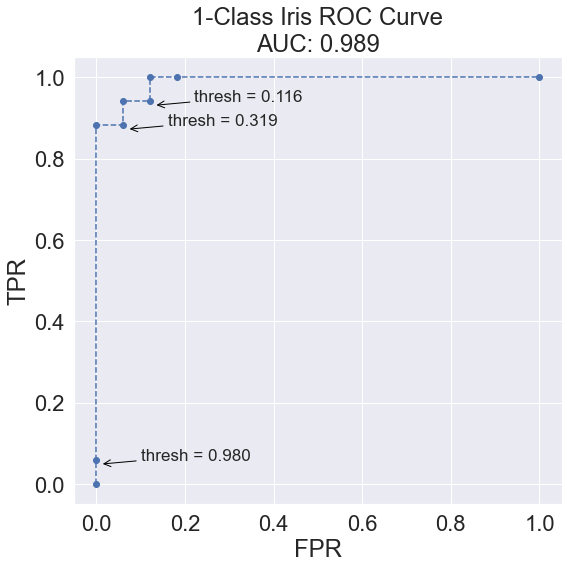

In [100]:
# Draw the ROC curve
fpr, tpr, thresh = roc_curve(iris_1c_test_tgt, prob_true)

auc_score = metrics.auc(fpr, tpr)

print('False Positive Rate:')
print(textwrap.fill(f"{['%.2f' % elem for elem in fpr]}", width=120))
print()
print('True Positive Rate:')
print(textwrap.fill(f'{tpr}', width=120))
print()
print('Threshold:')
print(textwrap.fill(str(thresh), width=180))

# Create the ROC plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(fpr, tpr, 'o--')
ax.set_title(f'1-Class Iris ROC Curve\nAUC: {auc_score:.3f}')
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")

investigate = np.array([1, 3, 5])
for idx in investigate:
    th, f, t = thresh[idx], fpr[idx], tpr[idx]
    ax.annotate(f'thresh = {th:.3f}', xy=(f+.01, t-.01), xytext=(f+.1, t),
                arrowprops={'arrowstyle': '->', 'color': 'black'}, size=17)
plt.tight_layout()
plt.show()


Most of the FPR values are between 0.0 and 0.2, while the TPR values quickly jump into the range of 0.9 to 1.0. Each point represents a different confusion matrix based on its unique threshold. The following shows the confusion matrices for all the thresholds returned by the `roc_curve` function.

Total thresholds: 9


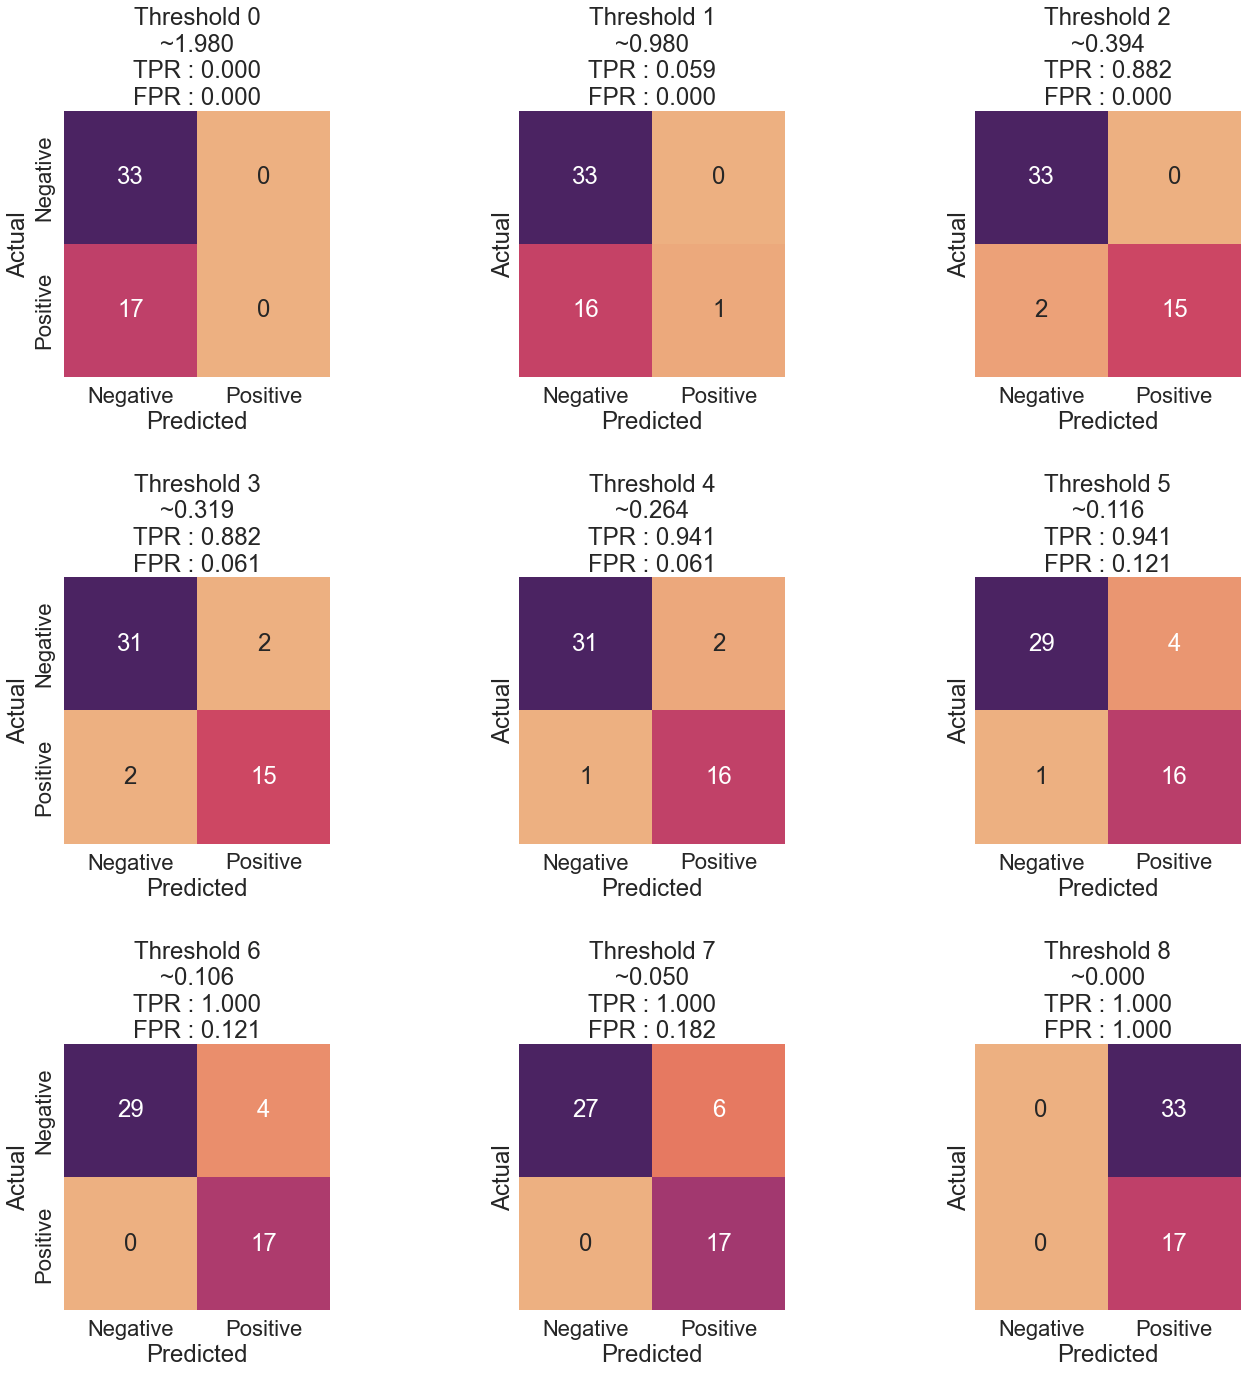

In [101]:
# Threshold confusion matrices

# How many thresholds were there, anyway?
print(f'Total thresholds: {len(thresh)}')

title_fmt = "Threshold {}\n~{:5.3f}\nTPR : {:.3f}\nFPR : {:.3f}"

np = ['Negative', 'Positive']
add_args = {'xticklabels': np,
            'yticklabels': np,
            'square': True}
fig, axes = plt.subplots(3, 3, sharey=True, figsize=(20, 20))
for ax, thresh_idx in zip(axes.flat, range(len(thresh))):
    preds_at_th = prob_true >= thresh[thresh_idx]
    cm = confusion_matrix(iris_1c_test_tgt, preds_at_th)
    sns.heatmap(cm, annot=True, cbar=False, ax=ax, cmap='flare',
                annot_kws={'size': 24}, **add_args)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title_fmt.format(thresh_idx,
                                  thresh[thresh_idx],
                                  tpr[thresh_idx],
                                  fpr[thresh_idx]))

#axes[0].set_ylabel('Actual')
plt.tight_layout(pad=4)
plt.show()


As we lower the threshold, the classifier predicts more positive examples, and the TPR increases. To choose a threshold, we can identify an acceptable TPR and then choose the threshold that gets the best FPR. Alternatively, we can perform the opposite action if we care more about the FPR than the TPR, as may be the case with identifying web pages from search engine requests, for example, where we do not want the classifier to return any incorrect web pages.

# AUC: Area-Under-the-(ROC)-Curve

---

The area under the curve (AUC) metric condenses the ROC curve into a single value. A diagonal line on a ROC curve generates an AUC value of 0.5, representing a classifier that makes predictions based on random coin flips. In contrast, a line that traces the perimeter of the graph generates an AUC value of 1.0, representing a perfect classifier.

We should approach the AUC metric cautiously because it is an overall measure of a classifier's performance at a series of thresholds, summarizing a lot of information into the subtlety of a single number. On the one hand, the number neglects that a classifier's behavior and rank order may change at any threshold. On the other hand, a single-valued AUC offers the benefit of efficiently computing other statistics from it and summarizing them graphically. For instance, let's look at several cross-validated AUCs displayed simultaneously on a strip plot.

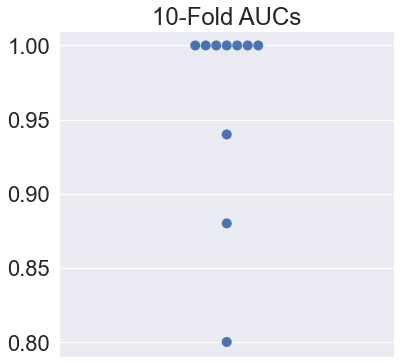

In [102]:
# Cross-validated AUCs on strip plot
model = KNeighborsClassifier(3)
cv_auc = cross_val_score(
    model, iris.data, iris.target == 1, scoring='roc_auc', cv=10)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = sns.swarmplot(y=cv_auc, size=10.0)
ax.set_title('10-Fold AUCs')
plt.show()

From this summarization, we can see that many folds return perfect results.

# Iris Dataset - Multiclass Classification

---

The `roc_curve` function from the `metrics` module is designed for use on binary classification problems. Concerning multiclass classification problems, one approach is to re-code the dataset into a series of one-versus-rest (OvR) alternatives. In such scenarios, the classifier considers each target class compared to all the others.
* 0 versus [1, 2]
* 1 versus [0, 2]
* 2 versus [0, 1]

The OvR multiclass strategy, also known as the one-vs-all strategy, offers computational efficiency compared to other techniques since only `n_classes` classifiers are needed. Additionally, the OvR strategy offers readily interpretable results, meaning we can gain knowledge about each class by inspecting its corresponding classifier since a single classifier represents a single class. Finally, the OvR strategy is the most commonly used method for multiclass classification problems and is what the `sklearn` documentation describes as a suitable default starting choice.

Before using our dataset with the `OneVsRestClassifier` function from the `multiclass` module, we must preprocess it using the `label_binarize` function from the `preprocessing` module. Let's look at samples 0, 50, and 100 from the original multiclass Iris dataset. We look at the samples' original encoding and view how the `label_binarize` function re-encodes them.

In [111]:
# label_binarize on Iris dataset samples
checkout = [0, 50, 100]
print("Original Encoding")
print(iris.target[checkout])
print()
print("'Multi-label' Encoding")
print(label_binarize(
    y=iris.target, classes=[0, 1, 2])[checkout])

Original Encoding
[0 1 2]

'Multi-label' Encoding
[[1 0 0]
 [0 1 0]
 [0 0 1]]


It may be a little easier to interpret these results when viewed as a DataFrame since the DataFrame provides column headers.

In [112]:
# print label_binarize dataframe
d = {'0': ['1', '0', '0'],
     '1': ['0', '1', '0'],
     '2': ['0', '0', '1']}

df = pd.DataFrame(data=d, index=['0', '1', '2'])
df

,0,1,2
0,1,0,0
1,0,1,0
2,0,0,1


Let's look at a few more examples from the `sklearn` documentation. 

In [105]:
# label_binarize simple example #1
print(label_binarize(y=[1, 6], classes=[1, 2, 4, 6]))

d = {'1': ['1', '0'],
     '2': ['0', '0'],
     '4': ['0', '0'],
     '6': ['0', '1']}

df = pd.DataFrame(data=d, index=['1', '6'])
df

[[1 0 0 0]
 [0 0 0 1]]


,1,2,4,6
1,1,0,0,0
6,0,0,0,1


The binary indicator (`1`) appears wherever the row labels form a cross-section with the column header. The `label_binarize` function also preserves the ordering of the classes, as in the following example:

In [113]:
# label_binarize preserve class ordering
label_binarize([1, 6], classes=[1, 6, 4, 2])

array([[1, 0, 0, 0],
       [0, 1, 0, 0]])

At last, binary targets transform to column vectors:

In [107]:
# label_binarize w/ binary targets
label_binarize(['yes', 'no', 'no', 'yes'], classes=['no', 'yes'])

array([[1],
       [0],
       [0],
       [1]])

Concerning the Iris dataset, after re-encoding the target class using the `label_binarize` function, we can look at the individual performance of the three classifiers, comparing their ROC curves. Let's create a _k_-NN classifier setting the `n_neighbors` to 5. We use the `predict_proba` function to calculate the probabilities of each class occurring after wrapping the estimator in the `OneVsRestClassifer` method from the `multiclass` module. Then we plot the ROC curves for each OvR classifier, allowing us to compare them all side-by-side.


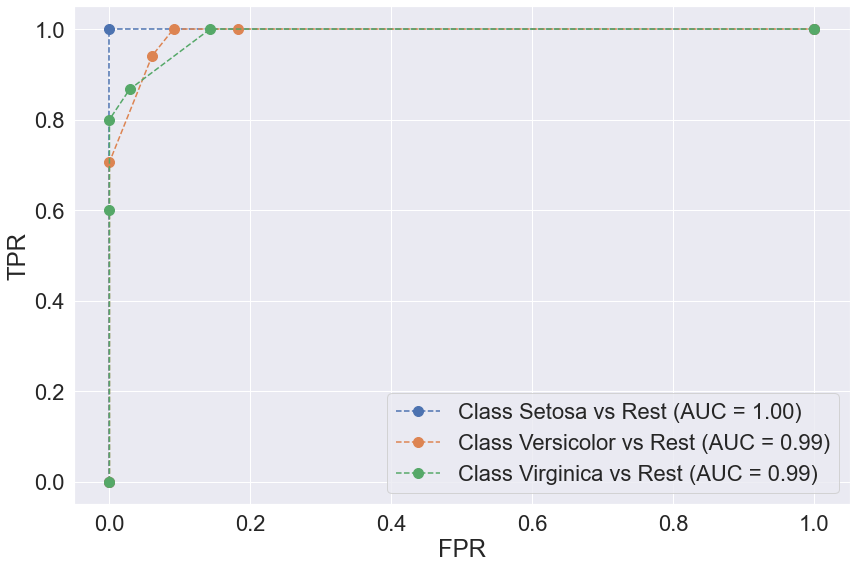

In [114]:
# Iris dataset multiclass classification
iris_multi_tgt = label_binarize(
    y=iris.target, classes=[0, 1, 2])

le = LabelEncoder()
le.fit(['Setosa', 'Versicolor', 'Virginica'])

(iris_multi_train_ftrs, iris_multi_test_ftrs,
 iris_multi_train_tgt, iris_multi_test_tgt) = train_test_split(iris.data,
                                                               iris_multi_tgt, test_size=.33, random_state=21)

# knn wrapped up in one-versus-rest (3 classifiers)
knn = KNeighborsClassifier(n_neighbors=5)
ovr_knn = OneVsRestClassifier(knn)
pred_probs = (ovr_knn.fit(iris_multi_train_ftrs, iris_multi_train_tgt)
              .predict_proba(iris_multi_test_ftrs))

# make ROC plots
fig, ax = plt.subplots(figsize=(12, 8))
for cls in [0, 1, 2]:
    fpr, tpr, _ = roc_curve(iris_multi_test_tgt[:, cls],
                            pred_probs[:, cls])

    label = f'Class {le.inverse_transform([cls])[0]} vs Rest (AUC = {metrics.auc(fpr,tpr):.2f})'
    ax.plot(fpr, tpr, 'o--', label=label, markersize=10)

ax.legend()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")

plt.tight_layout()
plt.show()


We see that all three classifiers perform reasonably well. As we saw previously, the setosa class is the easiest to predict. The remaining classifiers achieve excellent TPR rates (>= .75) at minimal FPR rates (<= .18). We will discuss another approach to multiclass classification in the next post, known as the One-versus-One approach.